In [2]:
from numpy import *
from pandas import *
import seaborn as sns

In [3]:
prop=sns.load_dataset("tips")

In [4]:
prop

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


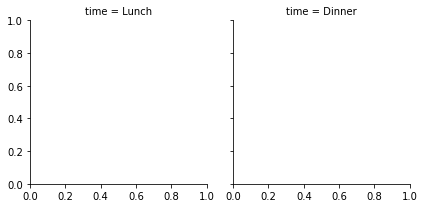

In [5]:
g=sns.FacetGrid(prop,col='time')

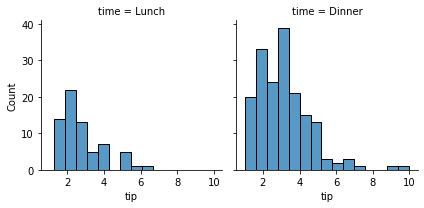

In [12]:
g=sns.FacetGrid(prop,col='time')
g.map(sns.histplot,'tip')

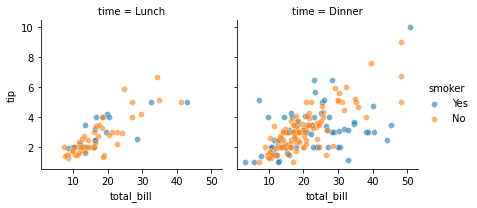

In [16]:
g=sns.FacetGrid(prop,col='time',hue='smoker')
g.map(sns.scatterplot,'total_bill','tip',alpha=0.6)
g.add_legend()

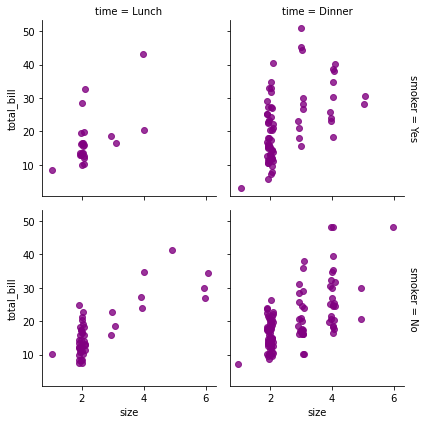

In [20]:
g=sns.FacetGrid(prop,row='smoker',col='time',margin_titles=True)
g.map(sns.regplot,"size","total_bill",color="purple",fit_reg=False,x_jitter=0.1)

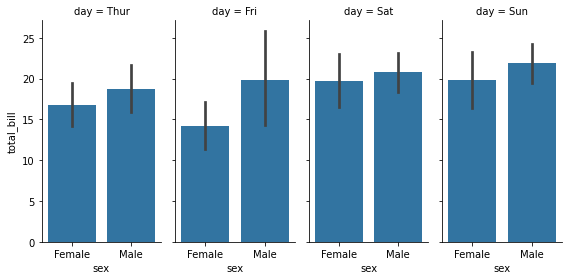

In [23]:
g=sns.FacetGrid(prop,col="day",height=4,aspect=0.5)
g.map(sns.barplot,"sex","total_bill",order=["Female","Male"])

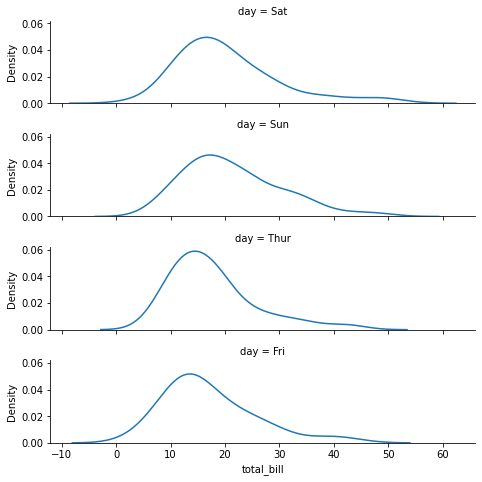

In [29]:
diasOrd=prop.day.value_counts().index
g=sns.FacetGrid(prop,row="day",row_order=diasOrd,height=1.7,aspect=4)
g.map(sns.kdeplot,"total_bill")

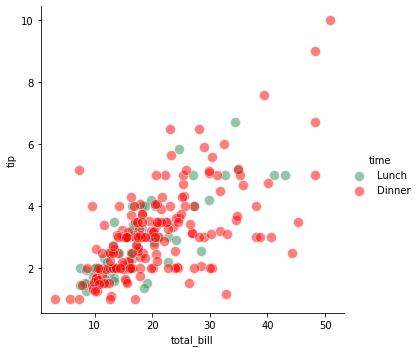

In [30]:
paleta=dict(Lunch="seagreen",Dinner="red")
g=sns.FacetGrid(prop,hue="time",palette=paleta,height=5)
g.map(sns.scatterplot,"total_bill",'tip',s=100,alpha=0.5)
g.add_legend()

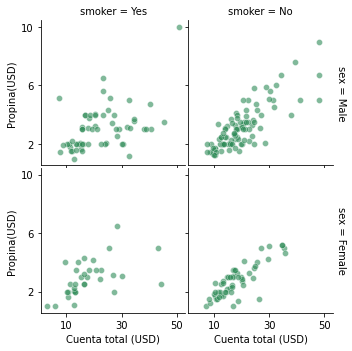

In [34]:
g=sns.FacetGrid(prop,row="sex",col="smoker",margin_titles=True,height=2.5)
g.map(sns.scatterplot,"total_bill","tip",color="seagreen",alpha=0.6)
g.set_axis_labels("Cuenta total (USD)","Propina(USD)")
g.set(xticks=[10,30,50],yticks=[2,6,10])
g.figure.subplots_adjust(wspace=.02,hspace=.02)

In [36]:
from scipy import stats
import matplotlib.pyplot as plt

In [39]:
def quantile_plot(x,**kwargs):
    quantiles,xr=stats.probplot(x,fit=False)
    plt.scatter(xr,quantiles,**kwargs)

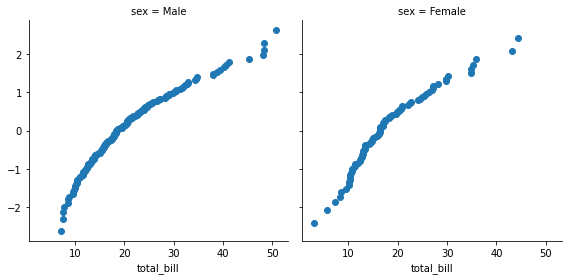

In [40]:
g=sns.FacetGrid(prop,col='sex',height=4)
g.map(quantile_plot,'total_bill')